In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade


# Unidad I. Variables, distribuciones y pruebas de hipótesis.

- Características numéricas de las variables aleatorias
- Concepto de muestra
- Estimación estadística de los parámetros de una distribución a partir de los
datos de una muestra



## Análisis descriptivo de datos

La estadística descriptiva:
  - quiere describir una muestra de manera
    - cualitativa (gráfica) o
    - cuantitativa (numérica)
  - ligada al
    - análisis exploratorio
    - análisis inicial
  - búsqueda de hipótesis
    - nuevos muestreos
    - experimentos

La estadística inferencial:
  - quiere inferir propiedades acerca de la población
  - se focaliza en:
    - asegurar la calidad de los datos
    - chequear las suposiciones
    - testear la hipótesis que tenemos en mente


## Muestra estadística

Muestra:
  - subconjunto de datos
    - tomados de una población estadística
    - mediante un proceso de muestreo determinado.

Observación:
  - Cada una de las unidades muestrales
  - es posible medir variables aleatorias sobre una observación.

Las **muestras** pueden ser:
- **Completas**:
  - Incluye a todos los casos, individuos u objetos de la población..
    que cumplen con un criterio (de selección) determinado.
  - Es difícil o imposible disponer de muestras completas.
- **Representativas**:
  - Conjunto de unidades muestrales seleccionadas de una muestra completa
  - usando un proceso de selección/muestreo que no depende de las propiedades de
    estas unidades.
  - Una manera de obtener muestras no sesgadas es seleccionando una
    **muestra aleatoria**


## Técnicas de muestreo

### Muestreo aleatorio simple

- Se selecciona un número k de unidades
- de manera aleatoria
- cada unidad tiene la misma probabilidad de ser seleccionado.
- El muestreo puede ser:
  - con reposición:
    - cada unidad puede ser seleccionada más de una vez.
  - sin reposición:
    - cada unidad puede ser seleccionada solo una vez.
    - seleccionar un elemento altera las probabilidades de selección del
      siguiente.
    - sin embargo cualquir orden de extracciñon es equiprobable.
  - Si el tamaño de la población es mucho mayor al tamaño de la muestra:
    - el muestreo con reposición y sin reposción se aproximan.

### Generación de muestras aleatorias en python

In [2]:
import numpy as np

population = np.arange(100)

sample_without_replacement = np.random.choice(
  a = population,
  size = 99,
  replace = False
)
all_different = len(np.unique(sample_without_replacement)) == 99

print(
  "Todos los elementos son diferentes en la muestra sin reemplazo? : "
  f"{all_different}"
)

sample_with_replacement = np.random.choice(
  a = population,
  size = 99,
  replace = True
)
all_different = len(np.unique(sample_with_replacement)) == 99

print(
  "Todos los elementos son diferentes en la muestra con reemplazo? : "
  f"{all_different}"
)


Todos los elementos son diferentes en la muestra sin reemplazo? : True
Todos los elementos son diferentes en la muestra con reemplazo? : False


In [25]:
# Se puede usar con elementos no numéricos también.
population = [
  "lunes",
  "martes",
  "miercoles",
  "jueves",
  "viernes",
  "sábado",
  "domingo"
]
np.random.choice(
  a = population,
  size = 5,
  replace = True
)

array(['jueves', 'viernes', 'miercoles', 'jueves', 'martes'], dtype='<U9')

### Muestreo sistemático

- Consiste en:
  - ordenar los elementos según alguna variable de interés
  - luego tomar n unidades muestrales equiespaciadas.
  - El primer elemento debe ser seleccionado al azar
    - quedando los otros determinados en relación a este.
- permite muestrear una variable de intereses en todo su rango.
- debe tenerse cuidado:
  - si la variable muestra alguna característica periódica
  - no se verá la variación entre dos elementos contiguos
    - nunca se seleccionan a la vez.

### Generación de muestras sistemáticas en python

- En este ejemplo vamoas a usar el conjunto de datos de **iris**.
  - Tamaño (ancho y largo) de pétalo y sépalo tres variantes de plantas.
- Vamos a ordenar según el largo de sus pétalos:

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris(as_frame=True)
df: pd.DataFrame = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df.sort_values(
  by="petal length (cm)",
)

sample_size = 17 # Aprox...
print(f"El tamaño de la muestra es {sample_size}")
spacing = int(round(len(df) / sample_size))
print(f"Los elementos estan espaciados cada {spacing} posiciones")
starting_position = np.random.randint(low=0, high=spacing-1)
print(f"Elijo una posición de inicio aleatoria: {starting_position}")
selected_positions = np.arange(len(df)) % spacing == starting_position
sample = df.iloc[selected_positions, :]
print(f"El tamaño real de la muestra es {len(sample)}")
sample


El tamaño de la muestra es 17
Los elementos estan espaciados cada 9 posiciones
Elijo una posición de inicio aleatoria: 4
El tamaño real de la muestra es 17


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
16,5.4,3.9,1.3,0.4,0
6,4.6,3.4,1.4,0.3,0
45,4.8,3.0,1.4,0.3,0
27,5.2,3.5,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
44,5.1,3.8,1.9,0.4,0
69,5.6,2.5,3.9,1.1,1
67,5.8,2.7,4.1,1.0,1
90,5.5,2.6,4.4,1.2,1
51,6.4,3.2,4.5,1.5,1


### Muestreo estratificado

- Se estratifica la población antes de tomar las muestras.
- Se divide la población en grupos homogéneos.
  - Los grupos son mutuamente excluyentes
  - Todos los miembros de la población deben pertenecer a un grupo
  - No pueden quedar miembros sin clasificar.
- Se realiza un muestreo de cada estrato
  - aleatorio simple
  - sistemático dentro



Existen tres posibles estrategias:
- **Asignación proporcional**:
  - El número de unidades de cada grupo:
    - es proporcional al número de individuos de cada grupo en la población.
  - Se respeta las proporciones de los grupos en la población.
- **Asignación óptima**:
  - El número de unidades de cada grupo:
    - es proporcional a la desviación estándar de la variable de interés.
- **Asignación uniforme**:
  - Igual número de elementos para cada grupo.
  - El dataset **iris** fue generado de esta forma.
    - 50 flores de cada especie.


La media del muestreo es:
 - $ \mu_{s} = \frac{1}{N} \sum_{h=1}^{L} N_{h} \mu_{h} $
 * $\mu_{s}$ es la media
 * $N$ es el tamaño de toda la población
 * $N_{h}$ es el tamaño del estrato h
 * $\mu_h$ es la media de la muestra del estrato h.


Ejercicio:
- Se quiere construir un set de datos similar a Iris, pero en lugar de 150
  muestras con 1000.
- Se quiere que la asignación sea óptima con respecto al largo del pétalo.
- ¿Cuántos elementos de cada especie deberían recolectarse?

## Estadísticos de resumen

Los estadísticos de resumen:
- describen de manera cuantitativa la distribución de una muestra.
- se describe cada variable aleatoria/dimensión manera independiente.

Existen estadísticos de:
- tendencia central
- dispersión
- forma:
  - asimetría (Skewness)
  - apuntamiento (Kurtosis)

Algunos estadísticos pueden ser robustos:
  - están menos afectados por valores extremos atípicos.
  - tienen bueana performance con muchos tipos de distribuciones.


### Estadísticos de tendencia central

Los estadísticos más comunes de este tipo:
- la *media*
  - Es el promedio aritmético de un conjunto de datos.
  - $\bar{X} = \frac{1}{N}\times{\sum_{i=1}^N{x_i}}$
  - No es robusto.
- La *mediana*.
  - Es el valor ubicado en el percentil 50 de una distribución.
- La *moda*
  - Es el valor más frecuente
    - es el único estadístico de tendencia central para datos nominales
  - Difícil de estimar correctamente para variables continuas.

In [8]:
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

In [9]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

In [10]:
df.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.0,1.4,0.2,0
1,NaN,NaN,1.5,NaN,1
2,NaN,NaN,NaN,NaN,2


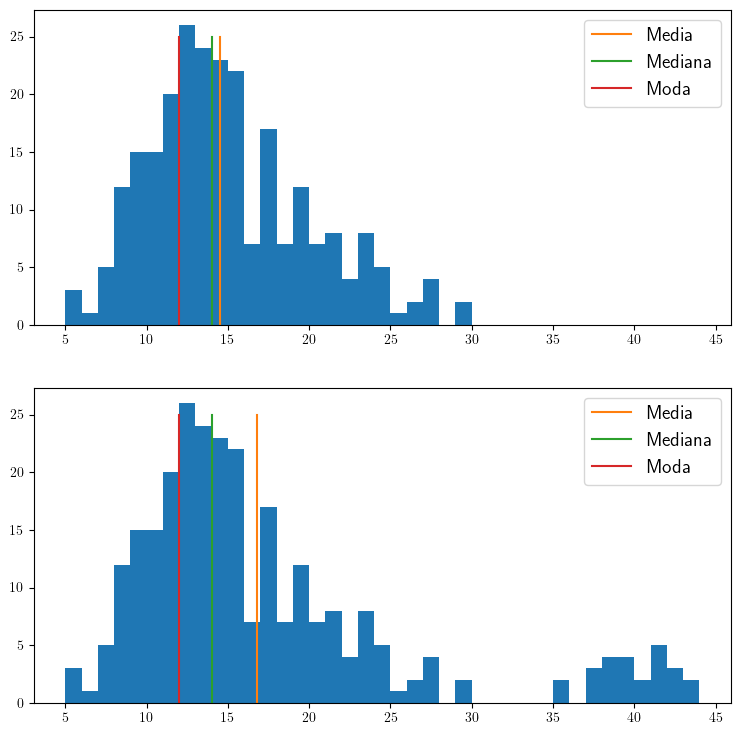

In [11]:
import C01
C01.mean_mode_median()


## Estadísticos de dispersión

- La *desviación estándar*
  - es el más popular
  - No es un estimador robusto.
  - $s=\sqrt{\frac{\sum_{i=1}^N{(x_i-\bar{x})^2}}{N-1}}$
  - Varianza: $s^2$
- El rango entre cuartiles:
  - Es la diferencia entre el tercer cuartil y el primer cuartil.
  - $Q_3 - Q_1$
- La desviación mediana absoluta **Median Absolute Deviation** (MAD).
  - Es análogo a la desviación estandard utilizando la mediana
  - $median(|X_i-median(X)|)$
- El rango:
  - Es la diferencia entre el valor máximo y mínimo.

In [12]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

In [13]:
df.quantile(0.75) - df.quantile(0.25) 

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64

In [14]:
(df - df.mean()).abs().median()

sepal length (cm)    0.656667
sepal width (cm)     0.257333
petal length (cm)    1.792000
petal width (cm)     0.799333
target               1.000000
dtype: float64

In [15]:
df.max() - df.min()

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
target               2.0
dtype: float64

((12.5, 82), (15.5, 82))


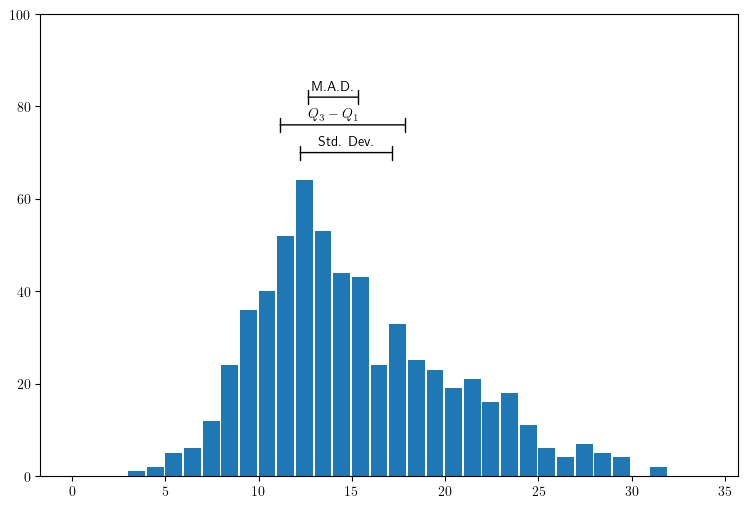

In [16]:
import C01
C01.dispersion_measures()

## Estadísticos de forma

Las medidas de forma de la distribución principales son:
  - el *Skewness* o *asimetría*
    - mide que tan simétricos son los datos con respecto a la media.
  - la *Kurtosis*
    - mide la concentración de datos cerca de la media.
  - El *exceso de kurtosis*
    - Es la diferencia con la kurtosis de la distribución normal estándar.
    - *Kurtosis - 3*
      - Igual a cero: igual a la distribución normal estándar.
      - Menor a cero: Más concentrado sobre la media.
      - Mayor a cero: Colas más pesadas.

In [17]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
target               0.000000
dtype: float64

In [18]:
df.kurtosis()

sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
target              -1.510135
dtype: float64

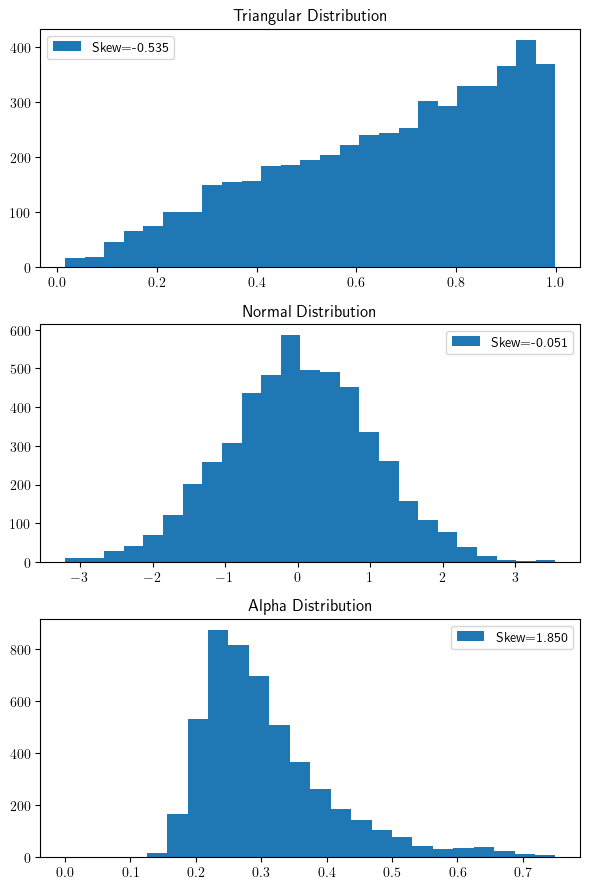

In [64]:
import C01
C01.skewness_plot()

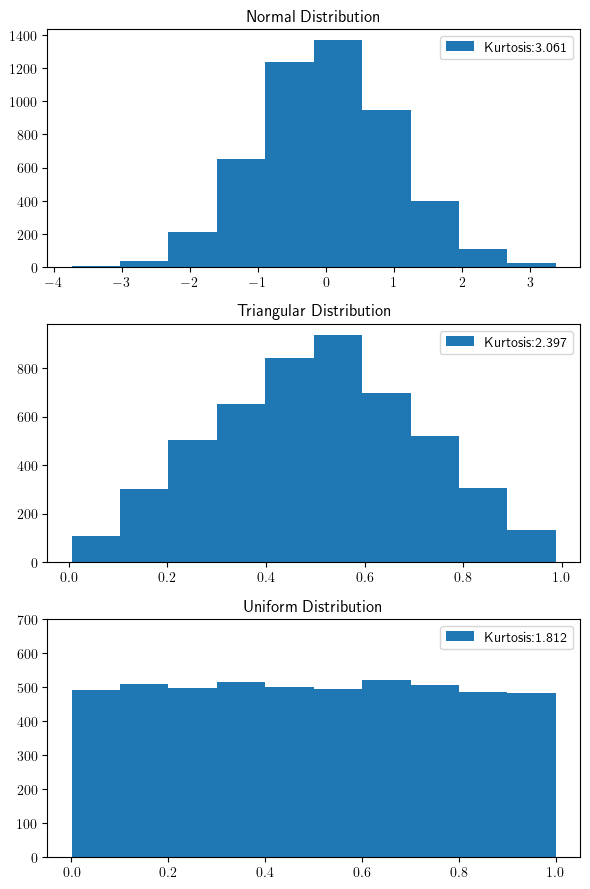

In [71]:
import C01
C01.kurtosis_plot()

## Descripción gráfica

Los *Histogramas* permiten:
- tener una visión de la forma de una distribución de densidad
  para una variable aleatoria continua.
- Se construyen:
  - Subdiviendo el dominio en grupos (*bins*)
  - contando el número de observaciones para cada *bin*.

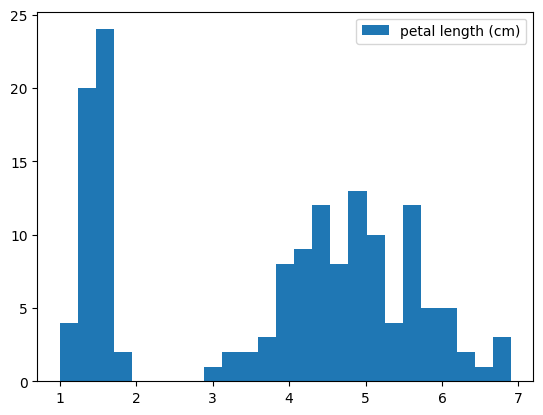

In [6]:
import matplotlib.pyplot as plt

var = "petal length (cm)"

plt.hist(
  df[var],
  bins = 25,
  label = var
)
plt.legend()


Los estimadores de núcleo de densidad (*Kernel Density Estimator*):
- generan curvas suaves que estiman la función de densidad de la muestra
- Tiene dos parámetros importantes:
  - Una función de probabilidad (kernel)
    - Por defecto se usa la distribución normal.
  - El ancho de banda a utilizar.
  - $\hat{f}(x) = \frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-x_i}{h})$
    - $K$ en la función de kernel
    - $h$ es el ancho de banda


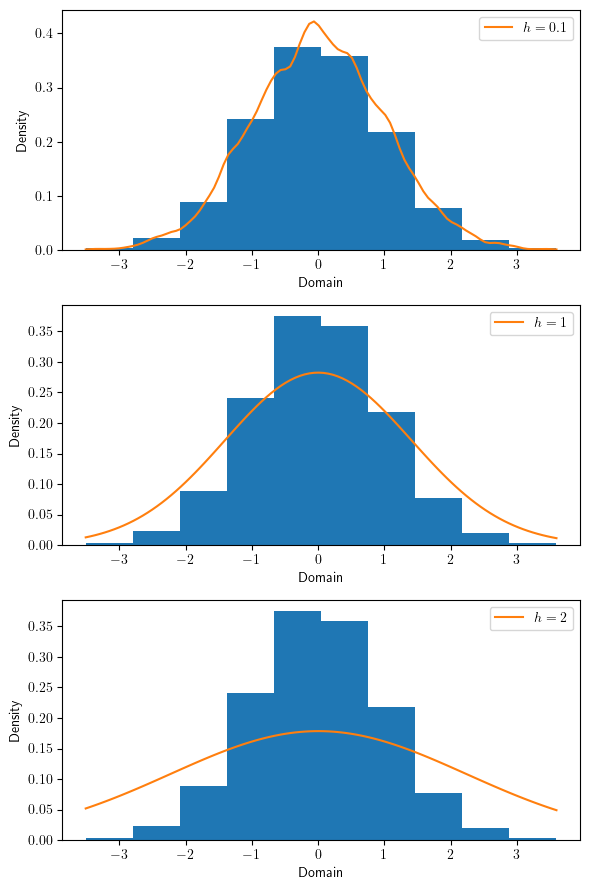

In [7]:
import C01
C01.kde_plot()

Los Diagramas de Dispersión:
- utilizan las coordenadas cartesianas
- muestran la distribución de dos variables en un espacio bi dimensional.
- Es posible representar más dimensiones utilizado diferentes formas, tamaños
  y/o colores.


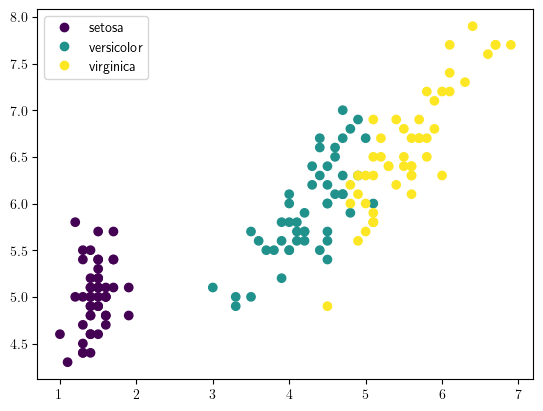

In [8]:
import matplotlib.pyplot as plt

var1 = "petal length (cm)"
var2 = "sepal length (cm)"

scatter = plt.scatter(
  x = df[var1],
  y = df[var2],
  c = df["target"]
)
a, b = scatter.legend_elements()
plt.legend(a, iris["target_names"])

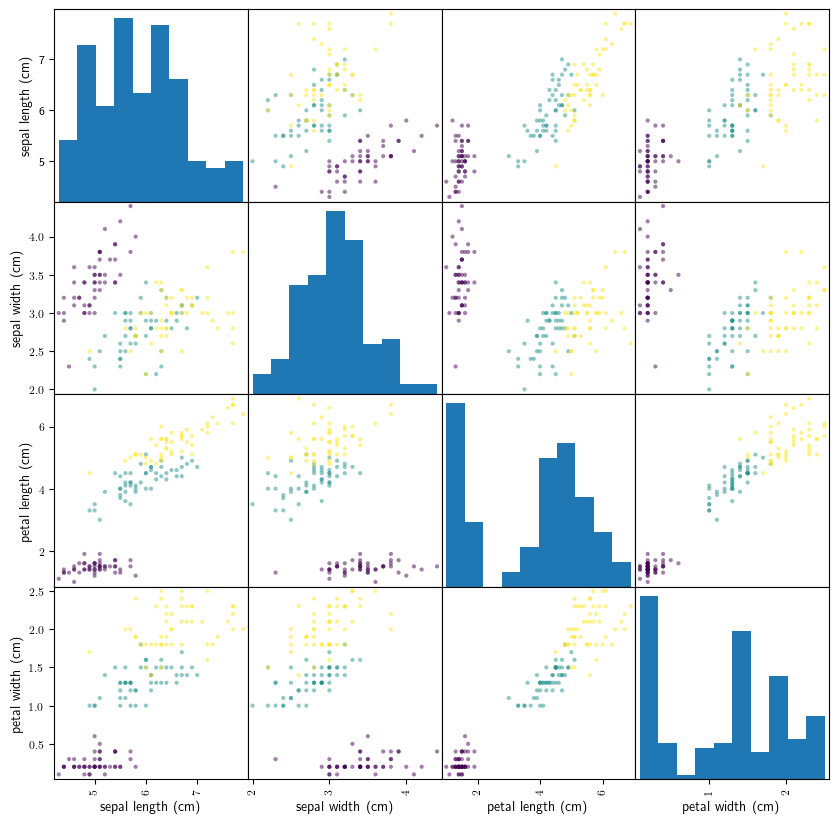

In [9]:
_ = pd.plotting.scatter_matrix(
  df.iloc[:,0:4],
  figsize=(10,10),
  c = df["target"]
)

Histogramas bivariados

- Los grupos (bins) se establecen para las dos variables
- se definen rectángulos
- Normalmente se utiliza un código de color para
  indicar la cantidad de valores en cada grupo.


Text(0, 0.5, 'Petal width (cm)')

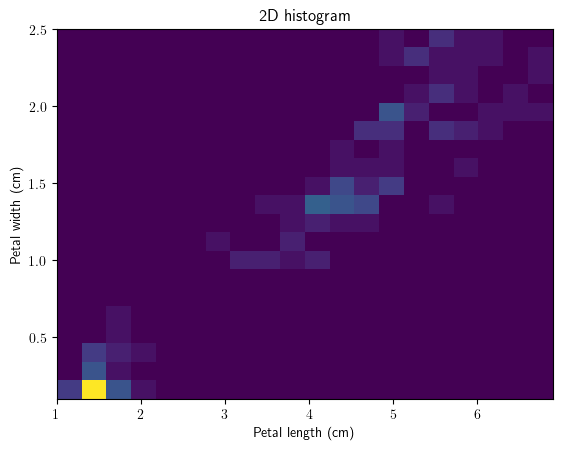

In [10]:
_ = plt.hist2d(
  df["petal length (cm)"],
  df["petal width (cm)"],
  bins = 20,
)
plt.title("2D histogram")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

### Mapa de calor (HeatMap)

- Similar a un histograma 2D
- Tienen variables categóricas o discretas en sus ejes.


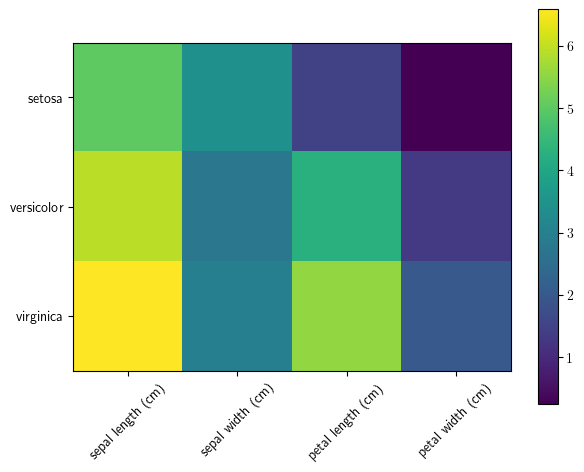

In [11]:
means_by_group = (
  df
    .groupby(
      by="target"
    )
    .aggregate(
      func = np.mean
    )
)
means_by_group.index = iris["target_names"]

im = plt.imshow(means_by_group)
plt.xticks(
  np.arange(len(means_by_group.columns)),
  means_by_group.columns,
  rotation = 45
)
plt.yticks(
  np.arange(len(iris["target_names"])),
  iris["target_names"]
)
cbar = plt.colorbar(im)
plt.tight_layout()


### Boxplots

- permiten observar estadísticos de:
  - tendencia central (mediana)
  - de dispersión (rango entre cuartiles).
  - valores extremos (outliers)

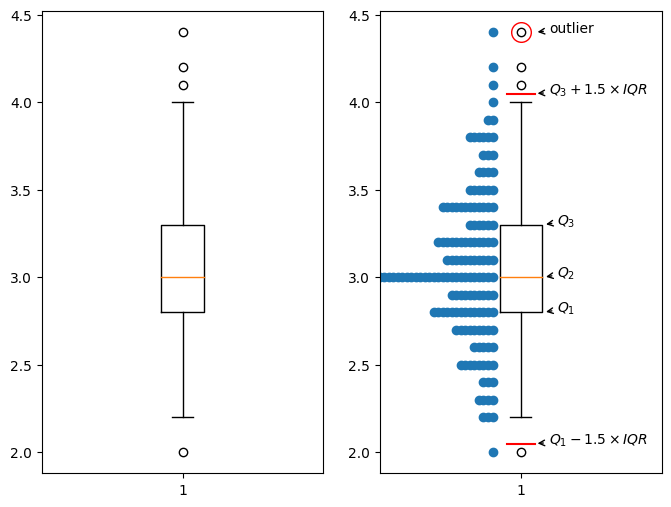

In [4]:
import C01
C01.boxplot_example()

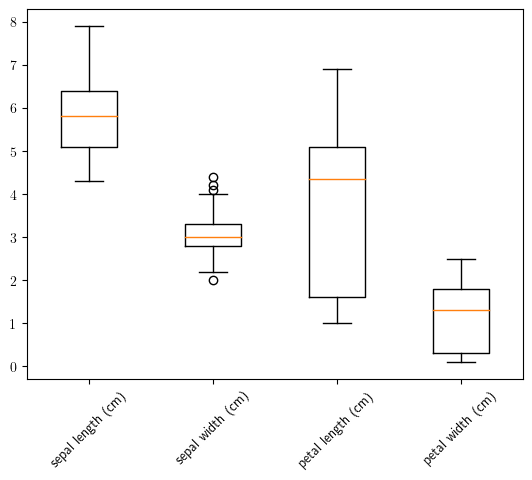

In [91]:
plt.boxplot(df.iloc[:,:4])
_ = plt.xticks(
  np.arange(len(df.columns[:4]))+1,
  df.columns[:4],
  rotation = 45
)


### Funciones Empíricas de Distribución Acumulada

- Estima una función de probabilidad acumulada (CDF)
- A partir de los datos


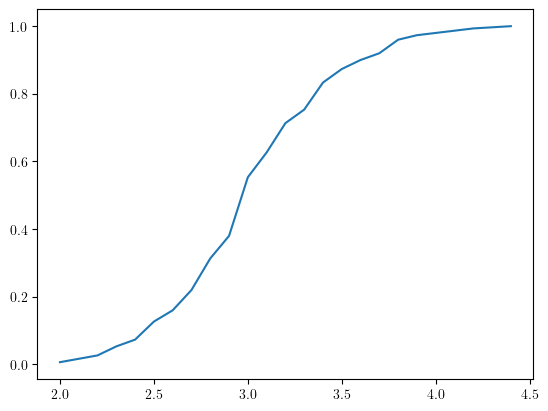

In [104]:

import scipy

s = df.iloc[:, 1].value_counts().sort_index().cumsum()
s = s / max(s)
plt.plot(s)


<BarContainer object of 20 artists>

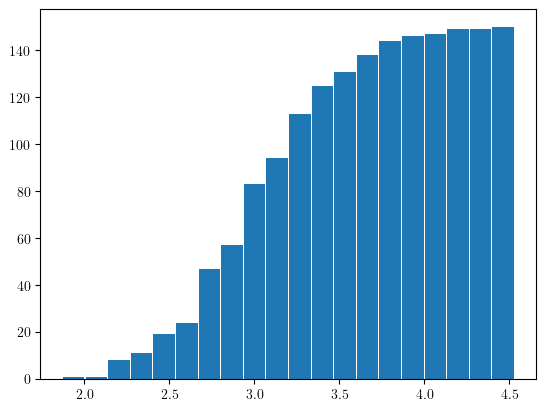

In [106]:
res = scipy.stats.cumfreq(
    a = df.iloc[:, 1],
    numbins = 20
)
plt.bar(
    x = np.linspace(
        res.lowerlimit,
        res.binsize * res.cumcount.size + res.lowerlimit,
        res.cumcount.size
    ),
    height = res.cumcount,
    width = res.binsize
)


### Ajuste de distribuciones estadísticas

- Encontrar:
  - la mejor función de distribución teórica
    - Se presume una familia y se ajustan los parámetros
  - de acuerdo a los datos que tenemos
- Los estadisticos y gráficos evaludados en la exploración pueden guiar la
  elección de la familiad de funciones.

El juste fue exitoso?: True
Los parametros ajustados son: FitParams(loc=0.0, scale=1.0)
Mensaje: Optimization terminated successfully.
Negative log likelihood: 1418.9385332046727


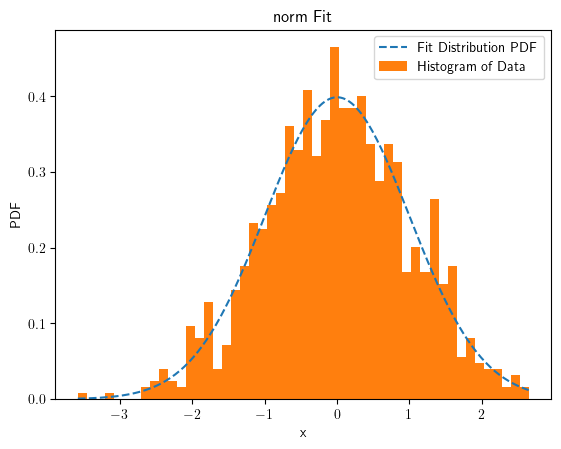

In [174]:
from scipy.stats import norm, fit
normal_sample = norm.rvs(
    loc=2,
    scale = 3,
    size = 1000
)

fitted_mu, fitted_sigma = norm.fit(normal_sample)

normal_sample_std = (normal_sample - fitted_mu) / fitted_sigma

fit_result = fit(
    dist = norm,
    data = normal_sample_std,
)
fit_result.plot()
print(f"El juste fue exitoso?: {fit_result.success}")
print(f"Los parametros ajustados son: {fit_result.params}")
print(f"Mensaje: {fit_result.message}")
# Negative log-likelihood function
# for given params and data
print(f"Negative log likelihood: {fit_result.nllf((0,1))}")



(array([0.07147706, 0.        , 0.        , 0.        , 0.        ,
        0.07147706, 0.42886238, 0.28590825, 0.35738531, 0.14295413,
        0.64329357, 0.42886238, 0.21443119, 0.21443119, 0.28590825,
        0.14295413, 0.07147706, 0.07147706, 0.07147706, 0.07147706]),
 array([-3.00595931, -2.72614927, -2.44633923, -2.16652919, -1.88671914,
        -1.6069091 , -1.32709906, -1.04728902, -0.76747897, -0.48766893,
        -0.20785889,  0.07195115,  0.3517612 ,  0.63157124,  0.91138128,
         1.19119132,  1.47100137,  1.75081141,  2.03062145,  2.31043149,
         2.59024154]),
 <BarContainer object of 20 artists>)

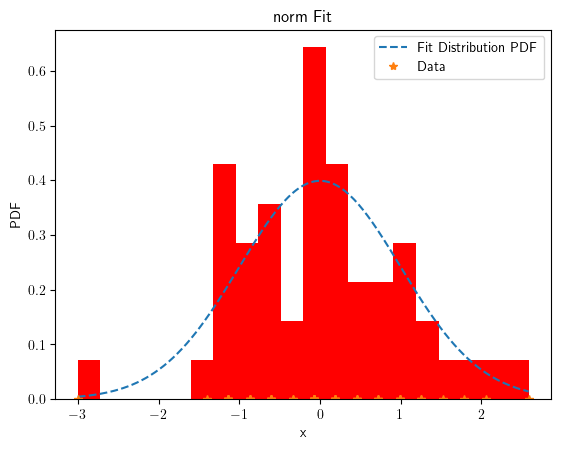

In [207]:
data = (
    df
        .loc[df.iloc[:, 4] == 0, :]
        .iloc[:, 1]
)
mu, dev = norm.fit(data)
data = (data-mu)/dev
res = scipy.stats.fit(
    scipy.stats.norm,
    data
)
res.plot()
plt.hist(
    data,
    density=True,
    color = "red",
    bins = 20
)

0.6802464285270567 2.959659620947935 1.5622624785650392


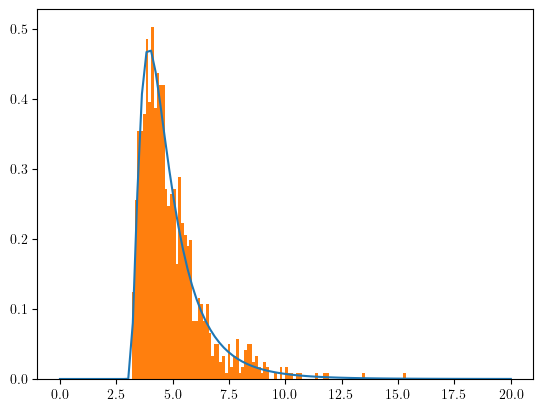

In [287]:
xs = np.linspace(0, 20, 100)
lognorm_sample = scipy.stats.lognorm.rvs(size=1000, s=0.7, loc=3, scale=1.6)
s, loc, scale = scipy.stats.lognorm.fit(lognorm_sample)
lognorm_data = scipy.stats.lognorm.pdf(xs, s=s, loc=loc, scale=scale)
fig, axes = plt.subplots()
axes.plot(xs, lognorm_data)
_ = axes.hist(lognorm_sample, density = True, bins=100)
print(s, loc, scale)


## Tests de normalidad

- Suele ser útil saber si nuestros datos se distribuyen normalmente
  - Propiedades del origen de datos
  - Requerimiento para tests estadísticos

### Gráfico de probabilidad normal

- Quantile / Quantile plots
  - Se compara cuantil a cuantil una distribución dada vs la distribución normal.
  - Si los datos provienen de una distribución normal,}
    - el gráfico se acerca a una recta.


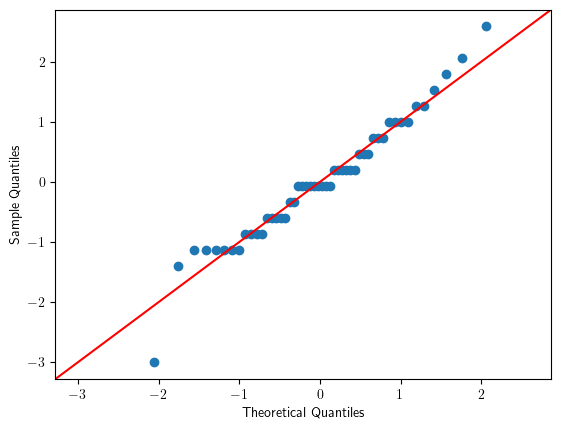

In [221]:
import statsmodels.api as sm
import scipy

data = (
    df
        .loc[df.iloc[:, 4] == 0, :]
        .iloc[:, 1]
)

fig = sm.qqplot(
    data = data,
    dist = scipy.stats.norm,
    fit = True,
    line = "45"
)

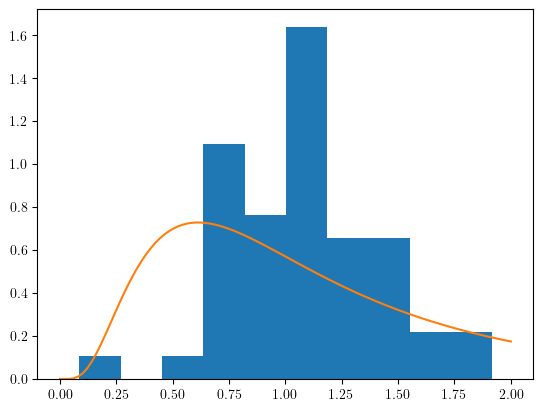

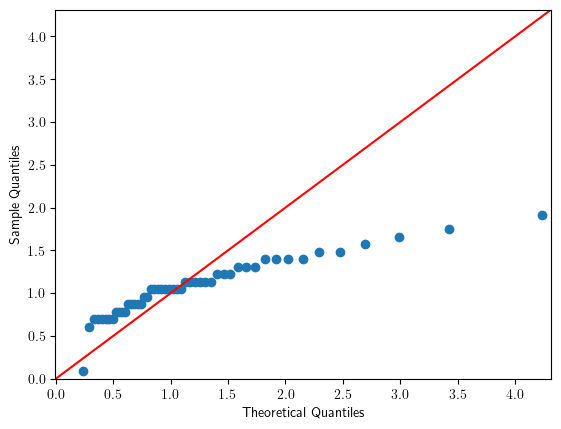

In [288]:
import statsmodels.api as sm
import scipy

data = (
    df
        .loc[df.iloc[:, 4] == 0, :]
        .iloc[:, 1]
)

s, loc, scale = scipy.stats.lognorm.fit(data, f0 = 0.7)
data = (data - loc) / scale
plt.hist(data, density = True)
plt.plot(
    np.linspace(0,2, 100),
    scipy.stats.lognorm.pdf(np.linspace(0,2,100), 0.7)
)
fig = sm.qqplot(
    data = data,
    dist = scipy.stats.lognorm,
    line = "45",
    distargs = (0.7,)
)

### Test de hipótesis

Existen diversos tests
- Hipótesis nula:
  - Los datos provienen de una distribución normal
- En general:
  - Se observa el p-valor devuelto
  - Si es menor que el nivel de significancia elegido.
    - Rechazo la hipótesis de normalidad.
- Test Anderson-Darling
- Test Shapiro-Wilk
- Test Kolmogorov-Smirnov
  - Compara la CDF de la función con la empírica de los datos
- Test D'Agostino-Pearson

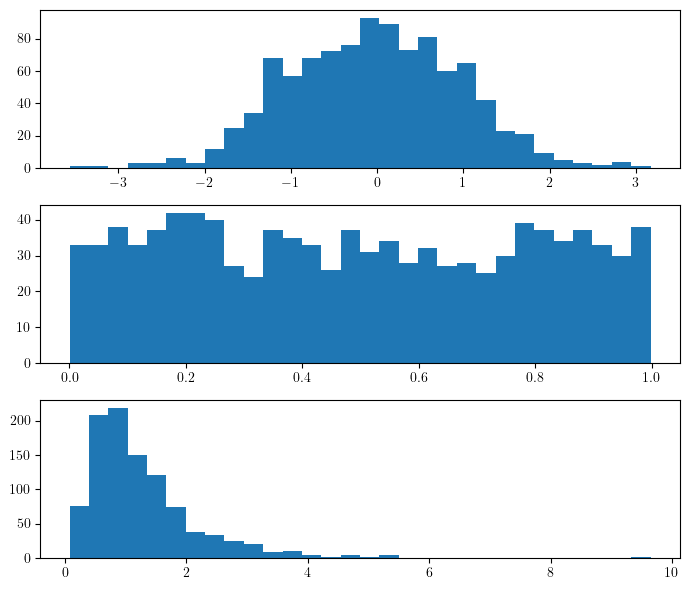

In [359]:
normal_sample = scipy.stats.norm.rvs(size=1000)
uniform_sample = scipy.stats.uniform.rvs(size=1000)
lognorm_sample = scipy.stats.lognorm.rvs(size=1000, s=0.7)
fig, axes = plt.subplots(
    nrows=3,
    figsize=(7, 6)
)
axes[0].hist(normal_sample, bins=30)
axes[1].hist(uniform_sample, bins=30)
axes[2].hist(lognorm_sample, bins=30)
fig.tight_layout()

In [360]:
normal_test = scipy.stats.anderson(normal_sample)
normal_stat = scipy.stats.anderson(normal_sample).statistic
uniform_stat = scipy.stats.anderson(uniform_sample).statistic
lognorm_stat = scipy.stats.anderson(lognorm_sample).statistic
print(f"El valor de estadistico para la dist. normal es: {normal_stat}")
print(f"El valor de estadistico para la dist. uniforme es: {uniform_stat}")
print(f"El valor de estadistico para la dist. lognormal es: {lognorm_stat}")
print(f"Los valores criticos son: {normal_test.critical_values}")
print(f"Los niveles de significancia son: {normal_test.significance_level}")

El valor de estadistico para la dist. normal es: 0.7271835946580723
El valor de estadistico para la dist. uniforme es: 13.721593046945827
El valor de estadistico para la dist. lognormal es: 38.84379752495761
Los valores criticos son: [0.574 0.653 0.784 0.914 1.088]
Los niveles de significancia son: [15.  10.   5.   2.5  1. ]


In [364]:
normal_stat = scipy.stats.shapiro(normal_sample)[1]
uniform_stat = scipy.stats.shapiro(uniform_sample)[1]
lognorm_stat = scipy.stats.shapiro(lognorm_sample)[1]
print(f"El p-valor para la dist. normal es: {normal_stat}")
print(f"El p-valor para la dist. uniforme es: {uniform_stat}")
print(f"El p-valor para la dist. lognormal es: {lognorm_stat}")

El p-valor para la dist. normal es: 0.13651777803897858
El p-valor para la dist. uniforme es: 3.4576325380596724e-18
El p-valor para la dist. lognormal es: 1.4259015663680686e-31


In [367]:
cdf_norm = scipy.stats.norm.cdf
normal_stat = scipy.stats.kstest(normal_sample, cdf_norm)[1]
uniform_stat = scipy.stats.kstest(uniform_sample, cdf_norm)[1]
lognorm_stat = scipy.stats.kstest(lognorm_sample, cdf_norm)[1]
print(f"El p-valor para la dist. normal es: {normal_stat}")
print(f"El p-valor para la dist. uniforme es: {uniform_stat}")
print(f"El p-valor para la dist. lognormal es: {lognorm_stat}")


El p-valor para la dist. normal es: 0.41357988021974346
El p-valor para la dist. uniforme es: 9.616484300038312e-232
El p-valor para la dist. lognormal es: 0.0


In [368]:
normal_stat = scipy.stats.normaltest(normal_sample)[1]
uniform_stat = scipy.stats.normaltest(uniform_sample)[1]
lognorm_stat = scipy.stats.normaltest(lognorm_sample)[1]
print(f"El p-valor para la dist. normal es: {normal_stat}")
print(f"El p-valor para la dist. uniforme es: {uniform_stat}")
print(f"El p-valor para la dist. lognormal es: {lognorm_stat}")


El p-valor para la dist. normal es: 0.9915920650486745
El p-valor para la dist. uniforme es: 1.6489519268537818e-261
El p-valor para la dist. lognormal es: 6.77700595650847e-115


In [410]:
result = (
    df
        .groupby("target")
        .aggregate(
            [
                lambda x: scipy.stats.anderson(x).statistic,
                lambda x: scipy.stats.normaltest(x)[1],
                lambda x: scipy.stats.kstest(x, scipy.stats.norm.cdf)[1],
                lambda x: scipy.stats.shapiro(x)[1]
            ]
        )
)
result = result.T

test_name = [
    "Anderson", "DAgostino", "KS", "Shapiro"
] * 4

index = result.index.to_frame()
index.iloc[:, 1] = test_name
index = result.index.from_frame(index)
result = result.set_index(index)

result.columns = iris["target_names"]
result

setosa     versicolor      virginica
0                 1                                                     
sepal length (cm) Anderson    4.079860e-01   3.608412e-01   5.516407e-01
                  DAgostino   9.074818e-01   6.565722e-01   9.008202e-01
                  KS         7.476239e-254  2.118911e-316  2.118911e-316
                  Shapiro     4.595011e-01   4.647379e-01   2.583135e-01
sepal width (cm)  Anderson    4.909560e-01   5.597552e-01   6.182051e-01
                  DAgostino   3.742419e-01   4.840907e-01   2.770870e-01
                  KS          6.593151e-99   1.413273e-82   2.865201e-93
                  Shapiro     2.715127e-01   3.379844e-01   1.808987e-01
petal length (cm) Anderson    1.007324e+00   5.550560e-01   6.089561e-01
                  DAgostino   3.267739e-01   1.903020e-01   2.593466e-01
                  KS          8.986498e-41  6.547541e-144  7.246190e-274
                  Shapiro     5.481128e-02   1.584763e-01   1.097750e-01
petal width (cm)  Anderson    4.714831e+00   9.568508e-01   7.387858e-01
                  DAgostino   5.702921e-04   8.489899e-01   5.383811e-01
                  KS          3.639705e-14   2.934018e-40   4.572615e-55
                  Shapiro     8.658606e-07   2.727822e-02   8.695303e-02

### Teorización *Post Hoc*

- Generación de hipótesis sugeridas por el conjunto de datos observado, sin
  testear esta hipótesis en nuevos datos.
  - puede resultar en aceptar hipótesis incorrectas
  - que sólo son válidas en el presente conjunto de datos

- Es necesario testear estas nuevas hipotesis en una nueva muestra de la
  población.
  - Sin embargo,
    - en muchas casos eso puede ser imposible:
      - analizar un fenómeno natural finito.
      - difícil o imposible la recolección de nuevos datos
  - puede surgir en la bioinformática
    - cuando se toman todos los elementos de una base de datos
    - sin dejar datos suficientes para testear las hipótesis

### Data *fishing*:
  - testear muchas hipótesis sobre un conjunto de datos
    - hasta encontrar un caso significativo

#### Alternativas para no caer en este problema:
  - Recolectar nuevos datos (out-of-sample data)
    realizar un nuevo experimento,
    para testear la nueva hipótesis.
  - Separar el conjunto de datos de manera aleatoria en dos grupos.
     - Uno para plantear nuevas hipótesis
     - El otro para evaluarlas.
  - Utilizar métodos de validación cruzada (cross validation)
    - evitar un sobreajuste (overfitting)
  - Aplicar correcciones por testeo múltiple.